## Notebook Imports

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [46]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

## Load the Data

In [47]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
#Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [48]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability
### The Dot Product

In [49]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a =', a)
print('b =', b)

a = [1 2 3]
b = [0 5 4]


In [50]:
# Dot Product Method, looks to be interchangeabe
a.dot(b)

22

In [51]:
# Logic behind dot products.
# Multiplies each value of each array at its matching index and gets the sum. 
1*0 + + 2*5 + 3*4 

22

In [52]:
# This array has 3 rows and 2 columns. 
c = np.array([[0,6], [3,0], [5,1]])
print('Shape of c is,', c.shape)
print(c)

Shape of c is, (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [53]:
# Dot product of arrays that do not have the same shapes 
print(a.dot(c))
print('Shape of the dot product is', a.dot(c).shape)

[21  9]
Shape of the dot product is (2,)


In [54]:
# Multiplies each value of a with each value in each column of c and gets the sum. 
[1*0 +2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

**Challenge**: figure out the dimensions of the dot product between X_test and prob_token_spam? 

In [55]:
dot_prod = X_test.dot(prob_token_spam)
print('The dot product between X_test and prob_token_spam is',dot_prod)
print('The shape is', dot_prod.shape)

The dot product between X_test and prob_token_spam is [0.43074024 0.14572173 0.14634242 ... 0.57102676 0.09088317 0.26089558]
The shape is (1724,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$$

In [56]:
PROB_SPAM = 0.3116

**Challenge** Calculate the log probabilities of the tokens given that the email was spam. This was stored in prob_token_spam. 

In [57]:
np.log(prob_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint probability in log format

In [58]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [59]:
# Probabilitise that an email is spam, given that its token. 
joint_log_spam[:5]

array([24.28360787,  2.16305488, 20.59344354, 17.75865473, 20.51721085])

**Challenge**: Calculate the log probabilities that the emails are non-spam given their tokens. Store the result in a variable called joint_log_ham. 

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1-P(-Spam))}{P(X)}$$

In [60]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [61]:
joint_log_ham[:5]

array([-60.9732416 , -11.01142777, -37.96955526, -59.13793992,
       -53.80718869])

# Making Predictions
### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>**OR**</center> 
<br>

$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$


**Challenge**: Create the vector of predictions, $\hat y$. Spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store the results in a variable called 'prediction'

In [62]:
prediction = joint_log_spam > joint_log_ham

In [63]:
prediction[-5:]

array([ True, False, False, False, False])

In [64]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) \neq \frac{P(X \, | \, Spam)}{P(X)}$$

In [65]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation
### Accuracy

In [66]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1685
Docs classified incorrectly 39


In [67]:
# Accuracy 
correct_docs/len(X_test)

0.9773781902552204

In [68]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualizing the Results

In [69]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)


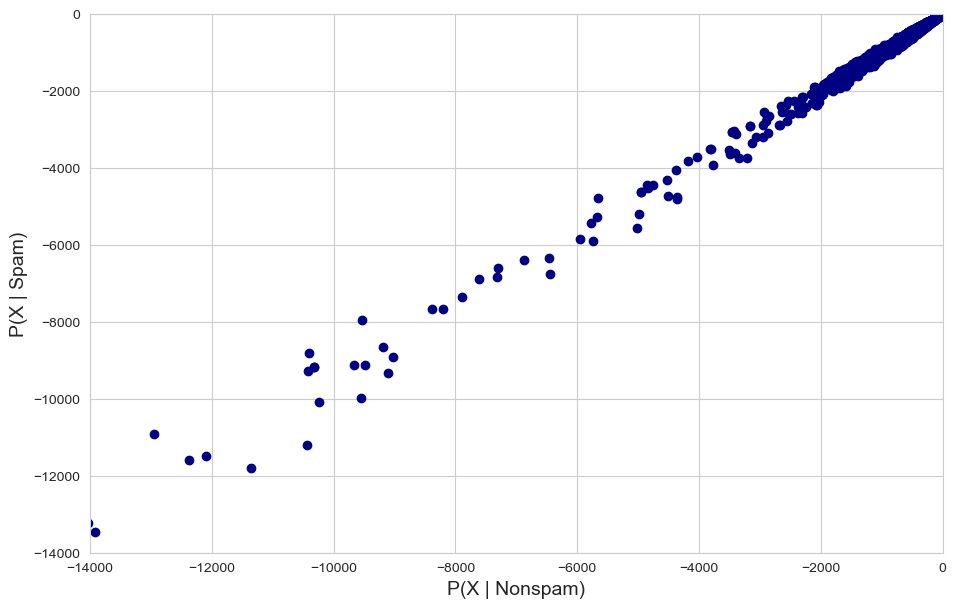

In [70]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()


## The Decision Boundary

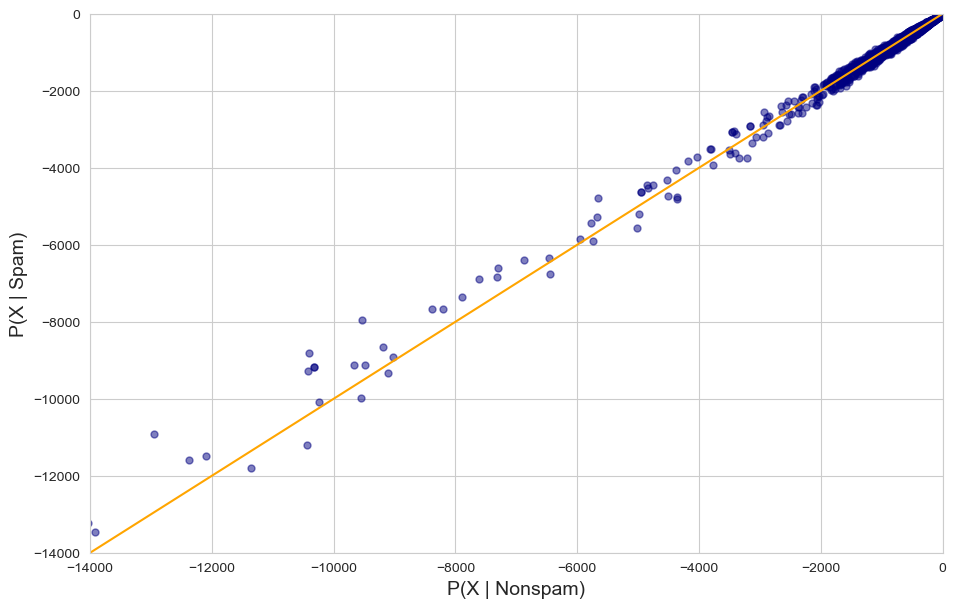

In [71]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
# Plots the line data
plt.plot(linedata, linedata, color='orange')


plt.show()


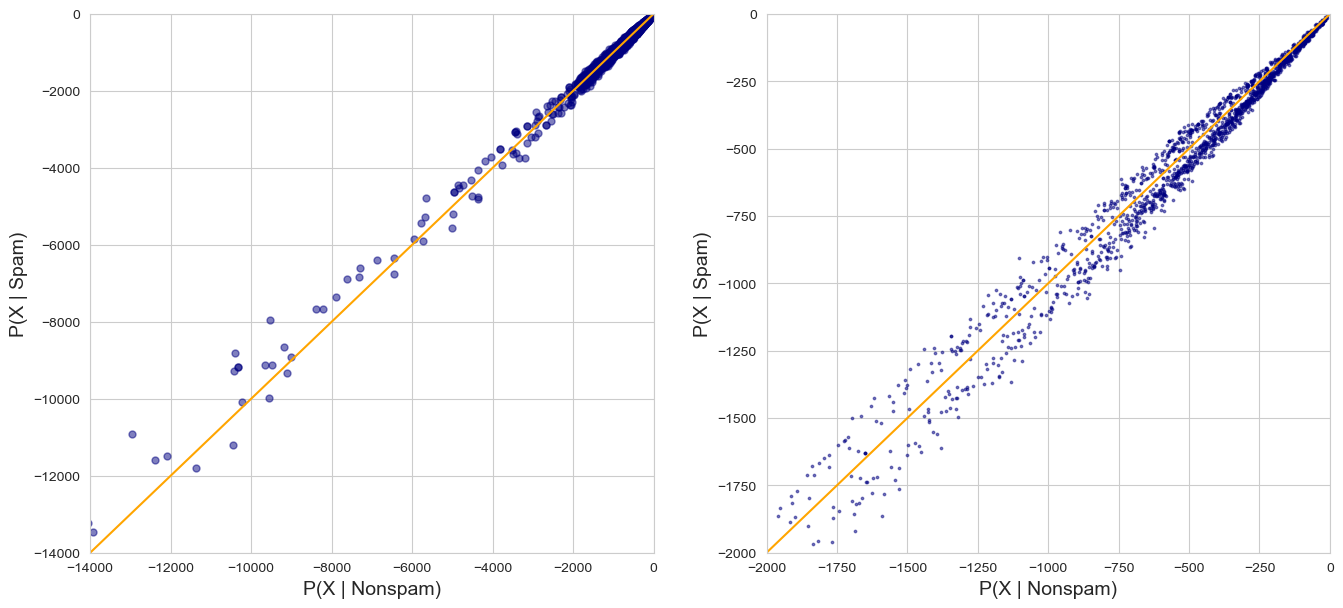

In [72]:
plt.figure(figsize=(16,7))

# Chart 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
# Plots the line data
plt.plot(linedata, linedata, color='orange')

# Chart 2
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
# Plots the line data
plt.plot(linedata, linedata, color='orange')


plt.show()


In [73]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

# Seaborn likes working with dataframes 
summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                           labels:y_test})

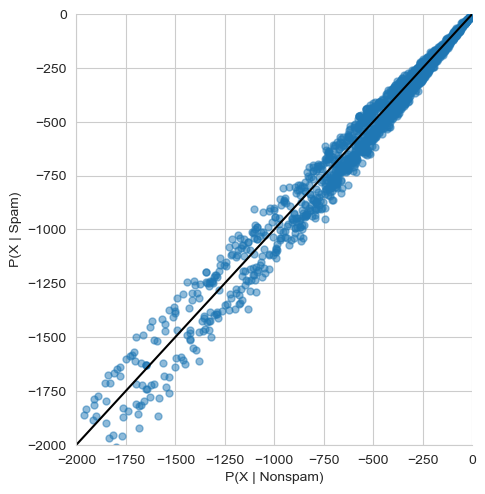

In [74]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, fit_reg=False,
           scatter_kws={'alpha': 0.5, 's':25})
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata,linedata,color='black')


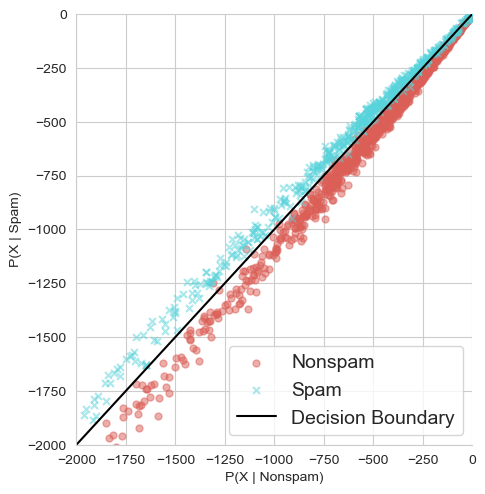

In [75]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, fit_reg=False,
           scatter_kws={'alpha': 0.5, 's':25}, hue=labels, markers=['o','x'],
           palette='hls', legend=False)

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata,linedata,color='black')

plt.legend(('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)

plt.show()

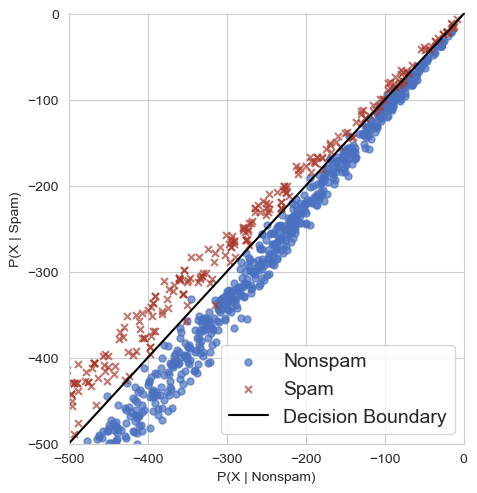

In [76]:
my_colors = ['#4a71C0','#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, fit_reg=False,
           scatter_kws={'alpha': 0.7, 's':25}, hue=labels, markers=['o','x'],
           palette=my_colors, legend=False)

plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata,linedata,color='black')

plt.legend(('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)

plt.show()

## False Positives and False Negatives

In [77]:
np.unique(prediction, return_counts=True)
# Predicted non-spam: 1136, Predicted spam 588

(array([False,  True]), array([1136,  588], dtype=int64))

In [78]:
# Uses bit wise & operator:
# Element by element comparisons.
true_pos = (y_test == 1) & (prediction == 1)

In [79]:
# Number of true positives
true_pos.sum()

569

**Challenge**: Create a numpy array that measures the False Positives for each datapoint. Call this variable ```false_pos```. Then work out how many false positives there were. Do the same for the false negatives. Store those in a variable called ```false_neg```. 

In [80]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [81]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

## Recall Score

**Challenge**: Calculate the recall score. Store it in a variable called ```recall_score```. Print the value of the recall score as a percentage rounded to 2 decimal places. 

$$Recall \ Score = \frac{True \ Positive}{True \ Positive + False \ Negative}$$

In [82]:
recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
print('Sensitivity=', round(recall_score*100, 2),'%')
print('Recall score is {:.2%}'.format(recall_score))

Sensitivity= 96.6 %
Recall score is 96.60%


## Precision Score

**Challenge**: Calculate the precison of the naive bayes model. Store the result in a variable called ```precision_score```. Print out the precision as a decimal number rounded to 3 decimal places. 

$$Precision \ Score = \frac{True \ Positive}{True \ Positive + False \ Positive}$$


In [83]:
precision_score = true_pos.sum()/(true_pos.sum() + false_pos.sum())
print('Precision score is {:.3%}'.format(precision_score))

Precision score is 96.769%


## F-Score or F1 Score

In [85]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
